In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_delivery = pd.read_csv('df_delivery.csv')

In [19]:
df_delivery

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_busy_partners,total_outstanding_orders,delivery_duration,partner_density,order_day,order_hour,order_period,busy_ratio,avg_item_price,order_size
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,14.0,21.0,3779.0,1.500000,Friday,22,Night,0.411765,860.250000,Medium
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,2.0,2.0,4024.0,0.333333,Tuesday,21,Evening,1.000000,1900.000000,Small
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,...,6.0,18.0,1586.0,0.421053,Monday,0,Night,0.666667,1192.750000,Medium
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,...,6.0,8.0,2273.0,0.555556,Thursday,3,Night,1.000000,1525.000000,Small
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,...,5.0,7.0,2988.0,0.625000,Tuesday,2,Night,0.833333,1810.000000,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166463,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,...,17.0,23.0,3907.0,0.708333,Tuesday,0,Night,0.944444,463.000000,Medium
166464,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,...,11.0,14.0,3383.0,0.800000,Friday,0,Night,0.846154,501.666667,Medium
166465,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,...,41.0,40.0,3008.0,0.951220,Saturday,4,Night,1.025000,367.200000,Medium
166466,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,...,7.0,12.0,3907.0,0.538462,Sunday,18,Evening,0.875000,1175.000000,Small


In [20]:
df_delivery['store_primary_category'].value_counts()


store_primary_category
american             17378
mexican              15161
pizza                14852
burger                9684
sandwich              8779
                     ...  
russian                 10
lebanese                 8
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 73, dtype: int64

In [21]:
unique_categories = df_delivery['store_primary_category'].unique()
print(unique_categories)

['american' 'mexican' 'indian' 'italian' 'sandwich' 'thai' 'cafe' 'salad'
 'pizza' 'chinese' 'singaporean' 'burger' 'mediterranean' 'japanese'
 'catering' 'filipino' 'convenience-store' 'greek' 'other' 'vegan' 'asian'
 'barbecue' 'breakfast' 'fast' 'smoothie' 'seafood' 'vietnamese' 'cajun'
 'steak' 'dessert' 'persian' 'nepalese' 'korean' 'sushi' 'latin-american'
 'chocolate' 'burmese' 'hawaiian' 'british' 'pasta' 'alcohol' 'vegetarian'
 'dim-sum' 'peruvian' 'turkish' 'ethiopian' 'middle-eastern' 'bubble-tea'
 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food' 'gastropub'
 'afghan' 'pakistani' 'moroccan' 'tapas' 'malaysian' 'soup' 'brazilian'
 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish' 'spanish'
 'russian' 'southern' 'lebanese' 'belgian' 'alcohol-plus-food']


In [22]:
category_mapping = {
    # Comida Rápida
    'burger': 'Fast Food',
    'sandwich': 'Fast Food',
    'fast': 'Fast Food',
    'smoothie': 'Fast Food',

    # Americana
    'american': 'American',
    'southern': 'American',
    'steak': 'American',
    'barbecue': 'American',

    # Mexicana y Latina
    'mexican': 'Mexican',
    'latin-american': 'Mexican',
    'argentine': 'Latin',
    'brazilian': 'Latin',
    'peruvian': 'Latin',
    'cajun': 'Latin',

    # Italiana
    'italian': 'Italian',
    'pasta': 'Italian',
    'pizza': 'Italian',

    # Asiática
    'chinese': 'Asian',
    'japanese': 'Asian',
    'thai': 'Asian',
    'korean': 'Asian',
    'vietnamese': 'Asian',
    'sushi': 'Asian',
    'dim-sum': 'Asian',
    'filipino': 'Asian',
    'singaporean': 'Asian',
    'burmese': 'Asian',
    'malaysian': 'Asian',
    'asian': 'Asian',

    # Mediterránea
    'greek': 'Mediterranean',
    'mediterranean': 'Mediterranean',
    'turkish': 'Mediterranean',
    'middle-eastern': 'Mediterranean',
    'lebanese': 'Mediterranean',
    'moroccan': 'Mediterranean',
    'spanish': 'Mediterranean',

    # Hindú y cercanos
    'indian': 'Indian',
    'pakistani': 'Indian',
    'nepalese': 'Indian',
    'afghan': 'Indian',

    # Europea
    'french': 'European',
    'german': 'European',
    'irish': 'European',
    'british': 'European',
    'belgian': 'European',
    'russian': 'European',

    # Saludable
    'salad': 'Healthy',
    'vegan': 'Healthy',
    'vegetarian': 'Healthy',
    'gluten-free': 'Healthy',

    # Postres y Bebidas
    'dessert': 'Desserts',
    'ice_cream': 'Desserts',
    'bakery': 'Desserts',
    'chocolate': 'Desserts',
    'bubble-tea': 'Beverages',
    'alcohol': 'Beverages',
    'alcohol-plus-food': 'Beverages',
    
    # Otros
    'catering': 'Other',
    'convenience-store': 'Other',
    'tapas': 'Other',
    'gastropub': 'Other',
    'kosher': 'Other',
    'cheese': 'Other',
    'soup': 'Other',
    'ethiopian': 'Other',
    'african': 'Other',
    'caribbean': 'Other',
    'hawaiian': 'Other',
    'persian': 'Other',
    'comfort-food': 'Other',
    'other': 'Other'
}


In [23]:
df_delivery['grouped_category'] = df_delivery['store_primary_category'].map(category_mapping)

# Rellenar categorías no mapeadas como 'Other'
df_delivery['grouped_category'] = df_delivery['grouped_category'].fillna('Other')


In [24]:
print(df_delivery['grouped_category'].value_counts())


grouped_category
Asian            33928
Fast Food        26338
Italian          21334
American         20811
Other            17134
Mexican          15623
Mediterranean     9195
Desserts          7700
Indian            6494
Healthy           4265
Beverages         2082
Latin              823
European           741
Name: count, dtype: int64


In [25]:
print(df_delivery[['store_primary_category', 'grouped_category']].head())


  store_primary_category grouped_category
0               american         American
1                mexican          Mexican
2                 indian           Indian
3                italian          Italian
4                italian          Italian


In [26]:
df_delivery

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_outstanding_orders,delivery_duration,partner_density,order_day,order_hour,order_period,busy_ratio,avg_item_price,order_size,grouped_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,21.0,3779.0,1.500000,Friday,22,Night,0.411765,860.250000,Medium,American
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,2.0,4024.0,0.333333,Tuesday,21,Evening,1.000000,1900.000000,Small,Mexican
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,...,18.0,1586.0,0.421053,Monday,0,Night,0.666667,1192.750000,Medium,Indian
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,...,8.0,2273.0,0.555556,Thursday,3,Night,1.000000,1525.000000,Small,Italian
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,...,7.0,2988.0,0.625000,Tuesday,2,Night,0.833333,1810.000000,Small,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166463,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,...,23.0,3907.0,0.708333,Tuesday,0,Night,0.944444,463.000000,Medium,Fast Food
166464,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,...,14.0,3383.0,0.800000,Friday,0,Night,0.846154,501.666667,Medium,Fast Food
166465,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,...,40.0,3008.0,0.951220,Saturday,4,Night,1.025000,367.200000,Medium,Fast Food
166466,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,...,12.0,3907.0,0.538462,Sunday,18,Evening,0.875000,1175.000000,Small,Fast Food


In [27]:
numeric_columns = df_delivery.select_dtypes(include=['float64', 'int64'])


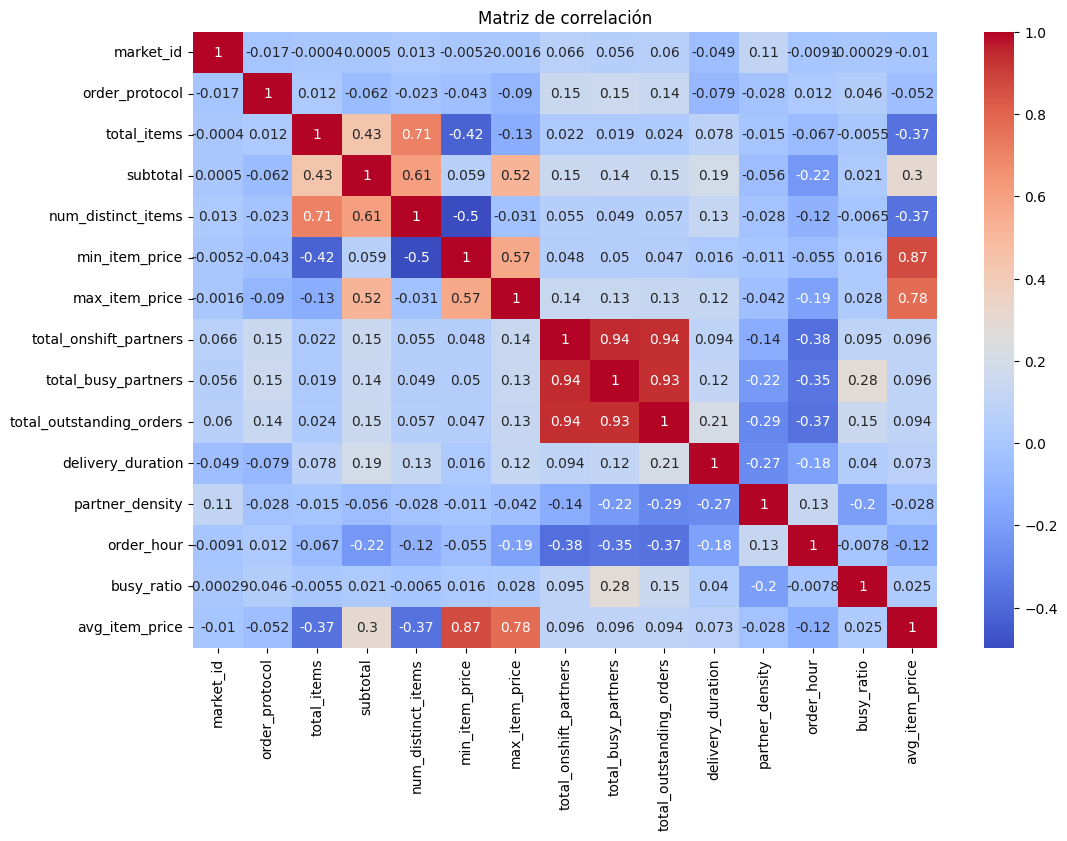

In [28]:
correlation_matrix = numeric_columns.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [29]:
columnas_tirar = ['store_id', 'created_at', 'actual_delivery_time', 'market_id', 'order_protocol']
df_delivery = df_delivery.drop(columns=columnas_tirar)


In [30]:
df_delivery

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_duration,partner_density,order_day,order_hour,order_period,busy_ratio,avg_item_price,order_size,grouped_category
0,american,4,3441,4,557,1239,33.0,14.0,21.0,3779.0,1.500000,Friday,22,Night,0.411765,860.250000,Medium,American
1,mexican,1,1900,1,1400,1400,1.0,2.0,2.0,4024.0,0.333333,Tuesday,21,Evening,1.000000,1900.000000,Small,Mexican
2,indian,4,4771,3,820,1604,8.0,6.0,18.0,1586.0,0.421053,Monday,0,Night,0.666667,1192.750000,Medium,Indian
3,italian,1,1525,1,1525,1525,5.0,6.0,8.0,2273.0,0.555556,Thursday,3,Night,1.000000,1525.000000,Small,Italian
4,italian,2,3620,2,1425,2195,5.0,5.0,7.0,2988.0,0.625000,Tuesday,2,Night,0.833333,1810.000000,Small,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166463,fast,3,1389,3,345,649,17.0,17.0,23.0,3907.0,0.708333,Tuesday,0,Night,0.944444,463.000000,Medium,Fast Food
166464,fast,6,3010,4,405,825,12.0,11.0,14.0,3383.0,0.800000,Friday,0,Night,0.846154,501.666667,Medium,Fast Food
166465,fast,5,1836,3,300,399,39.0,41.0,40.0,3008.0,0.951220,Saturday,4,Night,1.025000,367.200000,Medium,Fast Food
166466,sandwich,1,1175,1,535,535,7.0,7.0,12.0,3907.0,0.538462,Sunday,18,Evening,0.875000,1175.000000,Small,Fast Food


In [31]:
print(df_delivery.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166468 entries, 0 to 166467
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   store_primary_category    166468 non-null  object 
 1   total_items               166468 non-null  int64  
 2   subtotal                  166468 non-null  int64  
 3   num_distinct_items        166468 non-null  int64  
 4   min_item_price            166468 non-null  int64  
 5   max_item_price            166468 non-null  int64  
 6   total_onshift_partners    166468 non-null  float64
 7   total_busy_partners       166468 non-null  float64
 8   total_outstanding_orders  166468 non-null  float64
 9   delivery_duration         166468 non-null  float64
 10  partner_density           166468 non-null  float64
 11  order_day                 166468 non-null  object 
 12  order_hour                166468 non-null  int64  
 13  order_period              166468 non-null  o

In [32]:
df_delivery.to_csv('df_delivery_limpio.csv', index=False)

